## 서포트 벡터 머신

퍼셉트론은 가장 단순하고 빠른 판별 함수 기반 분류 뫃명이지만 판별 경계선(decision hyperplane)이 유니크하게 존재하지 않는다는 특징이 있다. 서포트 벡터 머신(SVM: support vector machine)은 퍼셉트론 기반의 모형에 가장 안정적인 판별 경계선을 찾기 위한 제한 조건을 추가한 모형이라고 볼 수 있다.

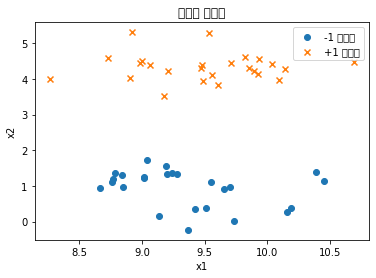

In [2]:
import warnings
 
warnings.filterwarnings("ignore")
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1e10).fit(X,y)

In [11]:
#각 클래스의 서포트의 개수
model.n_support_

array([1, 1])

In [6]:
# 각 클래스의 서포트의 인덳스
model.support_

array([42,  1])

In [12]:
# 각 클래스의 서포트의 x값 .x+ 와 x-
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [13]:
y[model.support_]

array([-1,  1])

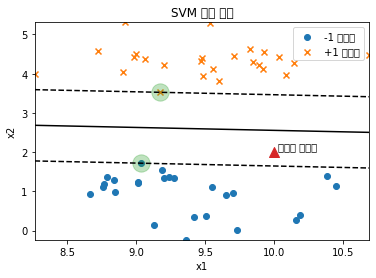

In [10]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [14]:
x_new = [10,2]
model.decision_function([x_new])


array([-0.61101582])

In [15]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [ ]:
hihi